In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
ROOT_PATH = 'flowers'

In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'

In [7]:
resenet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94765736/94765736 [==============================] - 94s 1us/step


In [11]:
resenet50.layers

In [14]:
for layer in resenet50.layers:
   layer.trainable=False

In [16]:
for layer in resenet50.layers:
    print(layer.name,layer.trainable)

input_2 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [17]:
resenet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [18]:
folders = glob('flowers/train/*')

In [19]:
folders

['flowers/train\\daisy',
 'flowers/train\\dandelion',
 'flowers/train\\rose',
 'flowers/train\\sunflower',
 'flowers/train\\tulip']

In [20]:
model=Sequential()
model.add(resenet50)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49279365 (187.99 MB)
Trainable params: 25691653 (98.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [26]:
training_set=train_datagen.flow_from_directory('flowers/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 498 images belonging to 5 classes.


In [27]:
test_set=test_datagen.flow_from_directory('flowers/validation',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Found 300 images belonging to 5 classes.


In [28]:
r=model.fit(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10


16/16 [==============================] - 54s 3s/step - loss: 14.7089 - accuracy: 0.2289 - val_loss: 11.3893 - val_accuracy: 0.2600
Epoch 2/10
16/16 [==============================] - 40s 2s/step - loss: 4.2014 - accuracy: 0.2711 - val_loss: 2.7171 - val_accuracy: 0.3300
Epoch 3/10
16/16 [==============================] - 39s 2s/step - loss: 1.6901 - accuracy: 0.3815 - val_loss: 2.3439 - val_accuracy: 0.2900
Epoch 4/10
16/16 [==============================] - 38s 2s/step - loss: 1.5709 - accuracy: 0.3735 - val_loss: 2.1334 - val_accuracy: 0.2567
Epoch 5/10
16/16 [==============================] - 39s 2s/step - loss: 1.7652 - accuracy: 0.3675 - val_loss: 2.5898 - val_accuracy: 0.2467
Epoch 6/10
16/16 [==============================] - 40s 2s/step - loss: 1.9369 - accuracy: 0.3414 - val_loss: 2.5550 - val_accuracy: 0.2533
Epoch 7/10
16/16 [==============================] - 39s 2s/step - loss: 1.4922 - accuracy: 0.4337 - val_loss: 1.8008 - val_accuracy: 0.3733
Epoch 8/10
16/16

In [29]:
import matplotlib.pyplot as plt

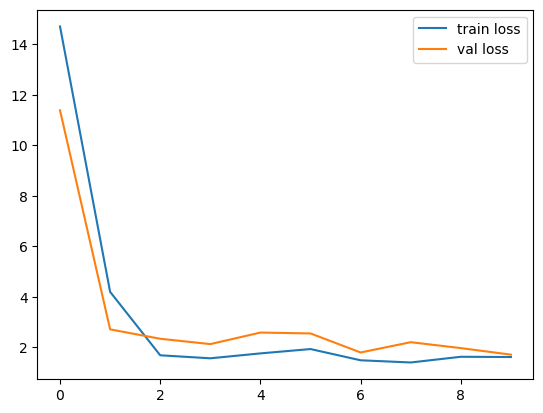

<Figure size 640x480 with 0 Axes>

In [30]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

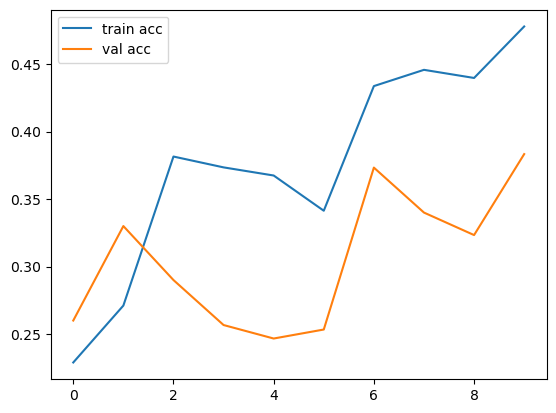

<Figure size 640x480 with 0 Axes>

In [32]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\ASUS ZenBook\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
y_pred = model.predict(test_set)

10/10 [==============================] - 16s 1s/step


In [35]:
y_pred

array([[0.26747063, 0.02632988, 0.43692032, 0.22322953, 0.0460497 ],
       [0.04833633, 0.05345517, 0.04351892, 0.84384316, 0.01084629],
       [0.6245615 , 0.05783005, 0.13082415, 0.11773083, 0.06905348],
       ...,
       [0.205966  , 0.33393496, 0.18522793, 0.13760811, 0.13726297],
       [0.37171125, 0.42544582, 0.06593319, 0.01908461, 0.11782516],
       [0.00926773, 0.6071601 , 0.04121348, 0.3244379 , 0.01792077]],
      dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 0, 0, 0, 1, 0, 3, 3, 3, 0, 3, 2, 0, 0, 1, 1, 3, 0, 3, 0, 0,
       3, 3, 3, 3, 0, 0, 1, 3, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 1, 3, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 1, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 1, 3, 1,
       3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3, 1, 1, 3, 1, 0, 3, 3, 0, 0, 1, 3,
       1, 3, 0, 3, 1, 2, 3, 1, 0, 3, 0, 1, 1, 3, 1, 3, 0, 2, 3, 1, 0, 1,
       1, 1, 3, 3, 3, 3, 1, 0, 3, 3, 2, 1, 0, 1, 0, 3, 3, 3, 0, 0, 0, 3,
       3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 2, 0, 2, 0, 2,
       0, 3, 1, 3, 0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 2,
       3, 1, 3, 3, 0, 3, 1, 3, 3, 0, 1, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3,
       1, 0, 2, 1, 3, 3, 1, 0, 0, 3, 3, 1, 3, 0, 0, 3, 0, 3, 1, 0, 0, 1,
       0, 0, 1, 3, 1, 1, 3, 3, 0, 0, 3, 3, 0, 3, 1, 0, 0, 3, 0, 1, 1, 3,
       0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 3, 0, 3, 3, 0, 3, 0, 0, 1, 1, 1], d

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('model_resnet50.h5')

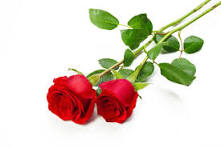

In [36]:
img=image.load_img('roses.jpeg')
img

In [37]:
x=image.img_to_array(img)

In [38]:
import cv2
x= cv2.resize(x, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

In [39]:
from keras.applications.vgg16 import preprocess_input

In [40]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[9.9995267e-01, 1.0683226e-06, 2.9940782e-07, 1.1379685e-05,
        3.4544584e-05]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 156ms/step


In [43]:
a

array([0], dtype=int64)

In [44]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [46]:
flower_name[a[0]]

'dandelion'